![logo](./img/LogoLine_horizon_C3S.png)

<br>

# Download Reanalysys: ERA5

### About


The notebook has the following outline:
* 1 - Download data from the CDS
* 2 - Hindcast data processing: calculate the reference climate mean
* 3 - Real-time forecasts: calculate seasonal forecast anomalies
* 4 - Visualize seasonal forecast monthly anomalies for a geographical subregion
  * 4.1 - Spatial maps
  * 4.2 - Time series of regional averages
* 5 - Reproduce C3S graphical products: compute 3-month anomalies

<br>

### Install packages

In [1]:
# Install CDS API for downloading data from the CDS
#!pip install cdsapi

In [ ]:
# Install cfgrib to enable us to read GRIB format files
#!conda install -c conda-forge cfgrib -y

In [1]:
# Miscellaneous operating system interfaces
import os

# CDS API
import cdsapi

# To map GRIB files to NetCDF Common Data Model
import cfgrib

# Libraries for working with multi-dimensional arrays
import numpy as np
import xarray as xr
import pandas as pd
import scipy

# Libraries for plotting and geospatial data visualisation
import matplotlib.path as mpath
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

# To work with data labels in dictionary format
from collections import OrderedDict

# Date and time related libraries
from dateutil.relativedelta import relativedelta
from calendar import monthrange
import datetime

# Interactive HTML widgets
import ipywidgets as widgets

# Disable warnings for data download via API
import urllib3 
urllib3.disable_warnings()

Here we specify a data directory where the reanalysis data is located and where we will save generated files

In [2]:
DATADIR = 'C:/Users/apedregal/Documents/inventWater_docs/Modelling/Seasonal forecasts/reanalysis'

1. Air temperature

In [18]:
# Define the coordinates to interpolate to
interp_longitude=2.25 #reach1=reach2=2.25
interp_latitude=42.05  #reach1=42.3, reach2=42.05
variable_name = '2m_temperature'
var_short = 't2m'

In [19]:
daily_data_list_t2m = []

for year_num in range(1993,2024):

    era5 = xr.open_dataset(f'{DATADIR}/ecmwf_era5_'+ str(year_num) + ' _hourly_' + var_short + '.grib', engine='cfgrib')
    
    era5_var = era5[var_short]

    #Interpolate the values for the specified coordinates
    hind_interp = era5_var.interp(latitude=interp_latitude, longitude=interp_longitude, method="nearest")

    #From hourly to daily 
    era5_24h = hind_interp.resample(time='1D').mean()
    daily_data_list_t2m.append(era5_24h)

#Merge years
era5_24h_all_t2m = xr.concat(daily_data_list_t2m, dim='time')

In [5]:
era5_24h_all_t2m

<xarray.DataArray 't2m' (time: 11322)>
array([271.87097, 269.9624 , 268.8744 , ..., 278.04892, 276.90915,
       277.1599 ], dtype=float32)
Coordinates:
    number     int32 0
    step       timedelta64[ns] 00:00:00
    surface    float64 0.0
    latitude   float64 42.3
    longitude  float64 2.25
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2023-12-31
Attributes: (12/30)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      25
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           2t
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown

2. Total Precipitation

In [20]:
# Define the coordinates to interpolate to
interp_longitude=2.25 #reach1=reach2=2.25
interp_latitude=42.05  #reach1=42.3, reach2=42.05
variable_name = 'total_precipitation'
var_short = 'tp'


In [21]:
daily_data_list_tp = []

for year_num in range(1993,2024):
    
    #convert data from hourly to daily
    #!cdo daysum {DATADIR + 'ecmwf_era5_'+ str(year_num) + '_hourly_' + var_short + '.grib'} {DATADIR + 'daily/ecmwf_era5_'+ str(year_num) + '_daily_' + var_short + '.grib'}

    era5 = xr.open_dataset(f'{DATADIR}/daily_tp/ecmwf_era5_'+ str(year_num) + '_daily_' + var_short + '.grib', engine='cfgrib')
    
    era5_var = era5[var_short]

    #Interpolate the values for the specified coordinates
    era5_interp = era5_var.interp(latitude=interp_latitude, longitude=interp_longitude, method="nearest")

    #From hourly to daily 
    #era5_24h = hind_interp.resample(time='1D').mean()
    daily_data_list_tp.append(era5_interp)

#Merge years
era5_24h_all_tp = xr.concat(daily_data_list_tp, dim='time')


#era5 = xr.open_dataset(f'{DATADIR}/ecmwf_era5_'+ str(year_num) + '_daily_' + var_short + '.grib', engine='cfgrib')
    
#era5_var = era5[var_short]

    #Interpolate the values for the specified coordinates
#era5_interp = era5_var.interp(latitude=interp_latitude, longitude=interp_longitude, method="nearest")
  
    #From hourly to daily 
#era5_24h = era5_interp.resample(time='1D').sum()
#era5_var.resample(time='1D',closed='right').sum()

Ignoring index file 'C:/Users/apedregal/Documents/inventWater_docs/Modelling/Seasonal forecasts/reanalysis/daily_tp/ecmwf_era5_1993_daily_tp.grib.9093e.idx' incompatible with GRIB file
Ignoring index file 'C:/Users/apedregal/Documents/inventWater_docs/Modelling/Seasonal forecasts/reanalysis/daily_tp/ecmwf_era5_1994_daily_tp.grib.9093e.idx' incompatible with GRIB file
Ignoring index file 'C:/Users/apedregal/Documents/inventWater_docs/Modelling/Seasonal forecasts/reanalysis/daily_tp/ecmwf_era5_1995_daily_tp.grib.9093e.idx' incompatible with GRIB file
Ignoring index file 'C:/Users/apedregal/Documents/inventWater_docs/Modelling/Seasonal forecasts/reanalysis/daily_tp/ecmwf_era5_1996_daily_tp.grib.9093e.idx' incompatible with GRIB file
Ignoring index file 'C:/Users/apedregal/Documents/inventWater_docs/Modelling/Seasonal forecasts/reanalysis/daily_tp/ecmwf_era5_1997_daily_tp.grib.9093e.idx' incompatible with GRIB file
Ignoring index file 'C:/Users/apedregal/Documents/inventWater_docs/Modellin

In [46]:
era5_24h_all_tp.values

array([1.9073486e-06, 7.1525574e-06, 1.1811256e-03, ..., 0.0000000e+00,
       0.0000000e+00, 1.8119812e-05], dtype=float32)

In [47]:
era5_24h_all_tp.time

<xarray.DataArray 'time' (time: 11322)>
array(['1993-01-01T11:30:00.000000000', '1993-01-02T11:30:00.000000000',
       '1993-01-03T11:30:00.000000000', ..., '2023-12-29T11:30:00.000000000',
       '2023-12-30T11:30:00.000000000', '2023-12-31T11:30:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time        (time) datetime64[ns] 1993-01-01T11:30:00 ... 2023-12-31T11:3...
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
    valid_time  (time) datetime64[ns] 1993-01-01T11:30:00 ... 2023-12-31T11:3...
    latitude    float64 42.05
    longitude   float64 2.25
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time

In [48]:
era5_24h_all_tp.time.time

<xarray.DataArray 'time' (time: 11322)>
array(['1993-01-01T11:30:00.000000000', '1993-01-02T11:30:00.000000000',
       '1993-01-03T11:30:00.000000000', ..., '2023-12-29T11:30:00.000000000',
       '2023-12-30T11:30:00.000000000', '2023-12-31T11:30:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time        (time) datetime64[ns] 1993-01-01T11:30:00 ... 2023-12-31T11:3...
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
    valid_time  (time) datetime64[ns] 1993-01-01T11:30:00 ... 2023-12-31T11:3...
    latitude    float64 42.05
    longitude   float64 2.25
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time

In [22]:
data_save = {'tp': era5_24h_all_tp.values*1000,'t2m': era5_24h_all_t2m.values-273.15}

In [23]:
df_save = pd.DataFrame(data_save)

In [24]:
df_save

,tp,t2m
0,0.001907,2.344513
1,0.007153,0.454010
2,1.181126,-1.652954
3,0.116825,-1.930756
4,0.000000,0.679626
...,...,...
11317,0.000000,6.230194
11318,0.000000,3.826569
11319,0.000000,5.766357
11320,0.000000,5.401062


In [25]:
# Saving as CSV
# tp and t2m merged without dates (for modelling)
df_save.to_csv('reanalysis_daily_all_C2.csv', index=False, sep=' ')

In [52]:
#tp with dates
df_tp = pd.DataFrame({'time': era5_24h_all_tp.time, 'values': era5_24h_all_tp.values*1000})
df_tp.to_csv('reanalysis_daily_tp_C2.csv', index=False)

In [53]:
#t2m with dates
df_t2m = pd.DataFrame({'time': era5_24h_all_t2m.time, 'values': era5_24h_all_t2m-273.15})
df_t2m.to_csv('reanalysis_daily_t2m_C2.csv', index=False)

In [28]:
#check wd
import os
print(os.getcwd())

C:\Users\apedregal\Documents\inventWater_docs\Modelling\Seasonal forecasts\Daniel\Github\ForecastHydroCarbon-main


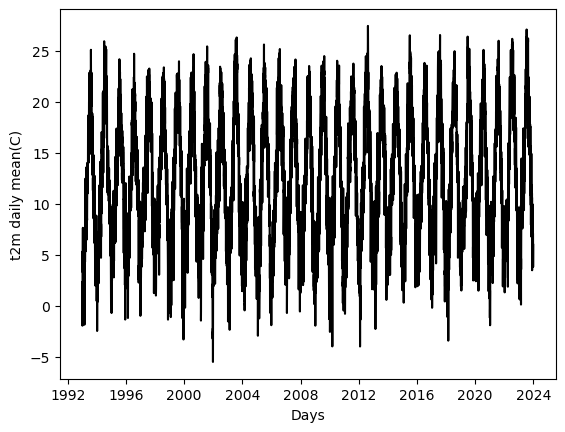

In [43]:
#plotting
plt.plot(era5_24h_all_t2m.time, era5_24h_all_t2m-273.15, color='black')

# Add labels and title
plt.xlabel('Days')
plt.ylabel('t2m daily mean(C)')
#plt.title('Data for each number')
#plt.legend()  # Add legend to differentiate lines
plt.show()

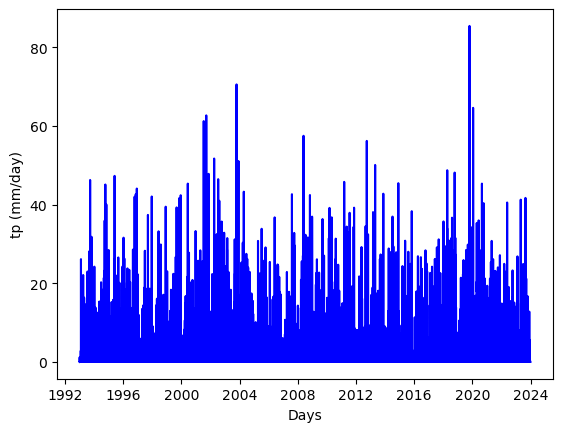

In [49]:
plt.plot(era5_24h_all_tp.time, era5_24h_all_tp.values*1000, color='blue')

# Add labels and title
plt.xlabel('Days')
plt.ylabel('tp (mm/day)')
#plt.title('Data for each number')
#plt.legend()  # Add legend to differentiate lines
plt.show()